## Bank Note Authentication Analysis

Whenever we go to the bank to deposit some cash money, the cashier places banknotes in a machine which tells whether a banknote is real or not. This is a classification problem where we are given some input data and we have to classify the input into one of the several predefined categories. Rule-based as well as statistical techniques are commonly used for solving classification problems. Machine learning algorithms fall in the category of statistical techniques.

In this article, we explain the process of building a banknote authentication system using machine learning algorithms. After reading this article, you will be able to understand how classification systems are built using machine learning algorithms.

### Importing pyforest library

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
from pyforest import *

In [60]:
#lazy_imports()

### Loding BankNote_Authentication(UCI) dataset from kaggle

In [4]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

#### There is no need of EDA process because data is already balanced and no missing value

In [7]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Visualization

<IPython.core.display.Javascript object>

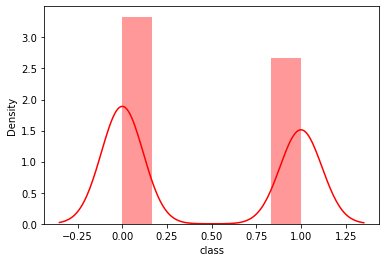

In [9]:
sns.distplot(df['class'],color='red',kde=True);

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


<IPython.core.display.Javascript object>

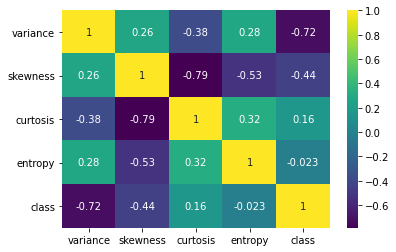

In [11]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

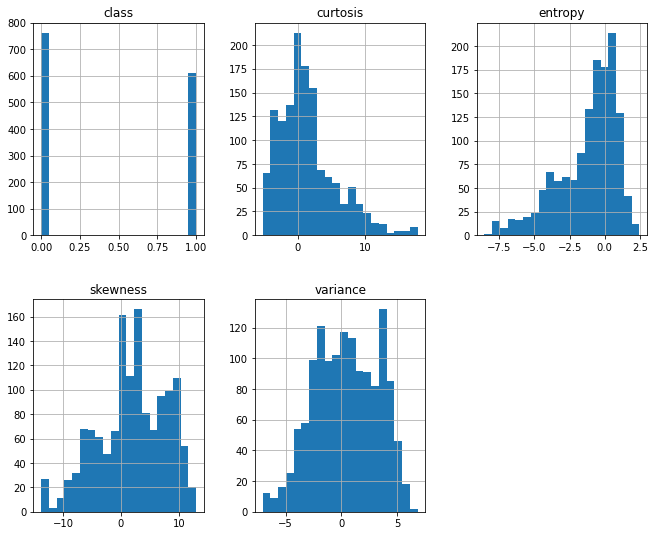

In [12]:
df.hist(bins=20,figsize=(11,9),layout=(2,3));

<IPython.core.display.Javascript object>

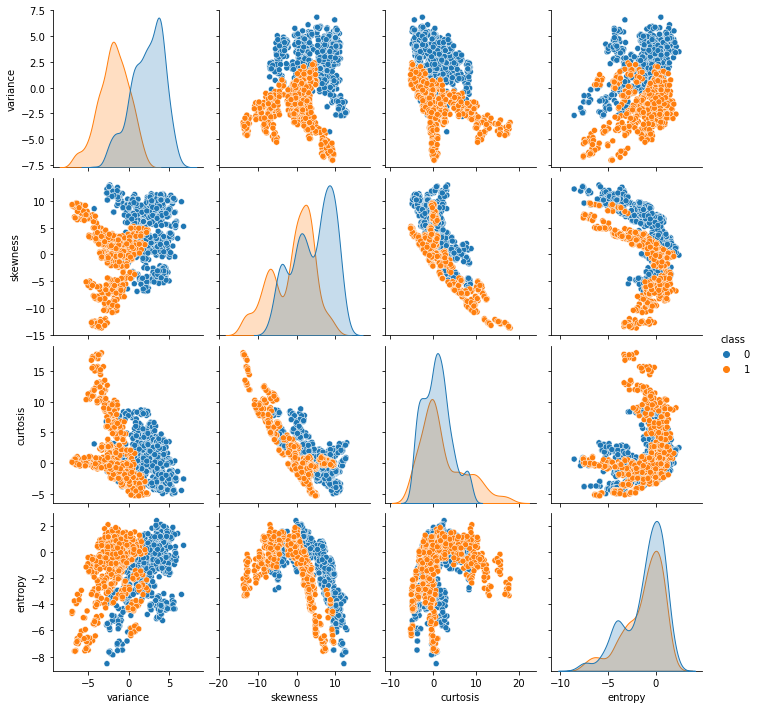

In [13]:
sns.pairplot(df,hue='class');

### Data to Build model

In [14]:
X = df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

### Splitting Data into train & test

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [17]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1097, 4)
y_train: (1097,)
X_test: (275, 4)
y_test: (275,)


### Data Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("X_train:\n", X_train)
print("\n")
print("X_test:\n", X_test)

X_train:
 [[-1.58438248  0.1072115  -0.14276339  0.03334576]
 [-1.08829139 -2.53123321  2.67783284 -0.35092979]
 [ 1.13672843 -0.15348755 -0.16820608  0.86368769]
 ...
 [-1.6900361   0.72314447 -0.19588896 -2.05114485]
 [ 0.57766241  0.02698182  0.1851622   0.52080477]
 [-0.9644631   0.30908695 -0.49734797 -0.03521515]]


X_test:
 [[-1.40564511 -0.03629527 -0.25946279 -0.55356298]
 [ 0.27456924  0.39719812  0.19050204  0.69982149]
 [-1.56677623 -1.70567084  2.36049857 -0.08188265]
 ...
 [ 0.33303672  0.90277959 -0.894603    0.10774845]
 [ 0.24291663 -0.00314587 -0.98169159  0.65423293]
 [ 0.44734548  0.89770987 -0.5083209  -0.56573811]]


### 1) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [21]:
classifire = LogisticRegression(solver='liblinear',random_state=1)

classifire.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",accuracies)

Accuracies:
  [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [22]:
print("Mean Accuracies: ",accuracies.mean())

Mean Accuracies:  0.9835863219349459


In [23]:
classifire_pred = classifire.predict(X_test)
classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [24]:
from sklearn import metrics

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

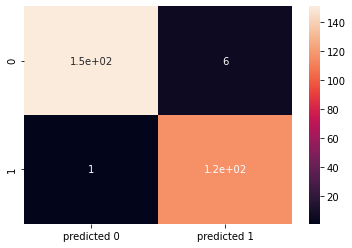

In [25]:
cm = metrics.confusion_matrix(y_test,classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 2) Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm_classifire = SVC(kernel="linear")

svm_classifire.fit(X_train,y_train)

svm_accuracies = cross_val_score(estimator=svm_classifire,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",svm_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [28]:
print("Mean Accuracy:",svm_accuracies.mean())

Mean Accuracy: 0.9854045037531277


In [29]:
svm_classifire_pred = svm_classifire.predict(X_test)
svm_classifire_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

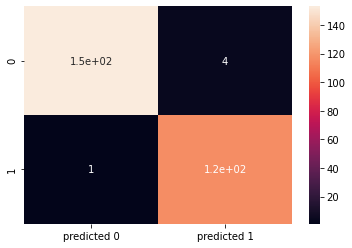

In [30]:
cm = metrics.confusion_matrix(y_test,svm_classifire_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 3) Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [33]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [34]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

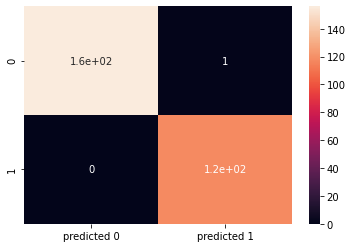

In [35]:
cm = metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 4) KNN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid)

grid.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [37]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [38]:
KNN = KNeighborsClassifier(n_neighbors=2 ,p=1 ,leaf_size=2 )

In [39]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [40]:
KNN_pred = KNN.predict(X_test)

In [41]:
knn_accuracies = cross_val_score(estimator=KNN,X=X_train,y=y_train,cv=10)

print("Accuracies:\n ",knn_accuracies)

Accuracies:
  [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [42]:
print("Mean Accuracy:",knn_accuracies.mean())

Mean Accuracy: 0.9972727272727273


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

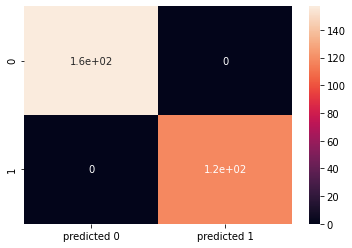

In [43]:
cm = metrics.confusion_matrix(y_test,KNN_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### 5) Multilayer Preception (Neural Network)

In [44]:
from sklearn.neural_network import MLPClassifier 

In [45]:
multi_class = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000, alpha=0.0001, solver='sgd',verbose=10,random_state= 21,tol=0.000000001)

In [46]:
multi_class.fit(X_train, y_train)

Iteration 1, loss = 1.02065261
Iteration 2, loss = 1.00232763
Iteration 3, loss = 0.97715486
Iteration 4, loss = 0.94973488
Iteration 5, loss = 0.92231418
Iteration 6, loss = 0.89651964
Iteration 7, loss = 0.87283524
Iteration 8, loss = 0.85051410
Iteration 9, loss = 0.83056223
Iteration 10, loss = 0.81132826
Iteration 11, loss = 0.79467501
Iteration 12, loss = 0.77862224
Iteration 13, loss = 0.76455037
Iteration 14, loss = 0.75105250
Iteration 15, loss = 0.73882781
Iteration 16, loss = 0.72727541
Iteration 17, loss = 0.71657090
Iteration 18, loss = 0.70615519
Iteration 19, loss = 0.69650376
Iteration 20, loss = 0.68705241
Iteration 21, loss = 0.67795411
Iteration 22, loss = 0.66915932
Iteration 23, loss = 0.66056959
Iteration 24, loss = 0.65225336
Iteration 25, loss = 0.64391579
Iteration 26, loss = 0.63595619
Iteration 27, loss = 0.62803230
Iteration 28, loss = 0.62041858
Iteration 29, loss = 0.61270498
Iteration 30, loss = 0.60516212
Iteration 31, loss = 0.59779594
Iteration 32, los

Iteration 259, loss = 0.04188603
Iteration 260, loss = 0.04169793
Iteration 261, loss = 0.04151085
Iteration 262, loss = 0.04133371
Iteration 263, loss = 0.04114986
Iteration 264, loss = 0.04096914
Iteration 265, loss = 0.04078835
Iteration 266, loss = 0.04061609
Iteration 267, loss = 0.04044067
Iteration 268, loss = 0.04026434
Iteration 269, loss = 0.04009450
Iteration 270, loss = 0.03992535
Iteration 271, loss = 0.03976054
Iteration 272, loss = 0.03959222
Iteration 273, loss = 0.03942884
Iteration 274, loss = 0.03926568
Iteration 275, loss = 0.03910304
Iteration 276, loss = 0.03893744
Iteration 277, loss = 0.03878404
Iteration 278, loss = 0.03861920
Iteration 279, loss = 0.03846199
Iteration 280, loss = 0.03830598
Iteration 281, loss = 0.03815187
Iteration 282, loss = 0.03800226
Iteration 283, loss = 0.03785460
Iteration 284, loss = 0.03770229
Iteration 285, loss = 0.03756117
Iteration 286, loss = 0.03741211
Iteration 287, loss = 0.03726985
Iteration 288, loss = 0.03711690
Iteration 

Iteration 512, loss = 0.02046894
Iteration 513, loss = 0.02042701
Iteration 514, loss = 0.02038257
Iteration 515, loss = 0.02034252
Iteration 516, loss = 0.02030666
Iteration 517, loss = 0.02026330
Iteration 518, loss = 0.02022178
Iteration 519, loss = 0.02018039
Iteration 520, loss = 0.02014305
Iteration 521, loss = 0.02010340
Iteration 522, loss = 0.02006458
Iteration 523, loss = 0.02002217
Iteration 524, loss = 0.01998025
Iteration 525, loss = 0.01994146
Iteration 526, loss = 0.01990187
Iteration 527, loss = 0.01986395
Iteration 528, loss = 0.01982180
Iteration 529, loss = 0.01978371
Iteration 530, loss = 0.01974482
Iteration 531, loss = 0.01970654
Iteration 532, loss = 0.01966994
Iteration 533, loss = 0.01962822
Iteration 534, loss = 0.01959167
Iteration 535, loss = 0.01955600
Iteration 536, loss = 0.01951895
Iteration 537, loss = 0.01947656
Iteration 538, loss = 0.01943905
Iteration 539, loss = 0.01940010
Iteration 540, loss = 0.01936248
Iteration 541, loss = 0.01932282
Iteration 

Iteration 761, loss = 0.01321497
Iteration 762, loss = 0.01319441
Iteration 763, loss = 0.01317384
Iteration 764, loss = 0.01315458
Iteration 765, loss = 0.01313402
Iteration 766, loss = 0.01311253
Iteration 767, loss = 0.01309444
Iteration 768, loss = 0.01307296
Iteration 769, loss = 0.01305290
Iteration 770, loss = 0.01303363
Iteration 771, loss = 0.01301368
Iteration 772, loss = 0.01299605
Iteration 773, loss = 0.01297456
Iteration 774, loss = 0.01295658
Iteration 775, loss = 0.01293456
Iteration 776, loss = 0.01291551
Iteration 777, loss = 0.01289509
Iteration 778, loss = 0.01287550
Iteration 779, loss = 0.01285695
Iteration 780, loss = 0.01283688
Iteration 781, loss = 0.01281723
Iteration 782, loss = 0.01279683
Iteration 783, loss = 0.01277941
Iteration 784, loss = 0.01275880
Iteration 785, loss = 0.01273747
Iteration 786, loss = 0.01271964
Iteration 787, loss = 0.01269907
Iteration 788, loss = 0.01267944
Iteration 789, loss = 0.01266000
Iteration 790, loss = 0.01264274
Iteration 

Iteration 1026, loss = 0.00910150
Iteration 1027, loss = 0.00909101
Iteration 1028, loss = 0.00907898
Iteration 1029, loss = 0.00906788
Iteration 1030, loss = 0.00905671
Iteration 1031, loss = 0.00904542
Iteration 1032, loss = 0.00903270
Iteration 1033, loss = 0.00902153
Iteration 1034, loss = 0.00901042
Iteration 1035, loss = 0.00899831
Iteration 1036, loss = 0.00898697
Iteration 1037, loss = 0.00897446
Iteration 1038, loss = 0.00896410
Iteration 1039, loss = 0.00895298
Iteration 1040, loss = 0.00893981
Iteration 1041, loss = 0.00892919
Iteration 1042, loss = 0.00891751
Iteration 1043, loss = 0.00890515
Iteration 1044, loss = 0.00889374
Iteration 1045, loss = 0.00888264
Iteration 1046, loss = 0.00887118
Iteration 1047, loss = 0.00885946
Iteration 1048, loss = 0.00884788
Iteration 1049, loss = 0.00883802
Iteration 1050, loss = 0.00882612
Iteration 1051, loss = 0.00881532
Iteration 1052, loss = 0.00880394
Iteration 1053, loss = 0.00879326
Iteration 1054, loss = 0.00878198
Iteration 1055

Iteration 1267, loss = 0.00683208
Iteration 1268, loss = 0.00682468
Iteration 1269, loss = 0.00681661
Iteration 1270, loss = 0.00680929
Iteration 1271, loss = 0.00680149
Iteration 1272, loss = 0.00679341
Iteration 1273, loss = 0.00678622
Iteration 1274, loss = 0.00677854
Iteration 1275, loss = 0.00677357
Iteration 1276, loss = 0.00676377
Iteration 1277, loss = 0.00675591
Iteration 1278, loss = 0.00674906
Iteration 1279, loss = 0.00674204
Iteration 1280, loss = 0.00673405
Iteration 1281, loss = 0.00672649
Iteration 1282, loss = 0.00672045
Iteration 1283, loss = 0.00671206
Iteration 1284, loss = 0.00670529
Iteration 1285, loss = 0.00669845
Iteration 1286, loss = 0.00669099
Iteration 1287, loss = 0.00668342
Iteration 1288, loss = 0.00667742
Iteration 1289, loss = 0.00667044
Iteration 1290, loss = 0.00666239
Iteration 1291, loss = 0.00665489
Iteration 1292, loss = 0.00664811
Iteration 1293, loss = 0.00664004
Iteration 1294, loss = 0.00663309
Iteration 1295, loss = 0.00662696
Iteration 1296

Iteration 1526, loss = 0.00527508
Iteration 1527, loss = 0.00527055
Iteration 1528, loss = 0.00526663
Iteration 1529, loss = 0.00526143
Iteration 1530, loss = 0.00525602
Iteration 1531, loss = 0.00525163
Iteration 1532, loss = 0.00524760
Iteration 1533, loss = 0.00524223
Iteration 1534, loss = 0.00523713
Iteration 1535, loss = 0.00523264
Iteration 1536, loss = 0.00522786
Iteration 1537, loss = 0.00522296
Iteration 1538, loss = 0.00521873
Iteration 1539, loss = 0.00521357
Iteration 1540, loss = 0.00520894
Iteration 1541, loss = 0.00520427
Iteration 1542, loss = 0.00519972
Iteration 1543, loss = 0.00519523
Iteration 1544, loss = 0.00519008
Iteration 1545, loss = 0.00518531
Iteration 1546, loss = 0.00518086
Iteration 1547, loss = 0.00517589
Iteration 1548, loss = 0.00517123
Iteration 1549, loss = 0.00516697
Iteration 1550, loss = 0.00516257
Iteration 1551, loss = 0.00515795
Iteration 1552, loss = 0.00515303
Iteration 1553, loss = 0.00514894
Iteration 1554, loss = 0.00514408
Iteration 1555

Iteration 1770, loss = 0.00429679
Iteration 1771, loss = 0.00429358
Iteration 1772, loss = 0.00429037
Iteration 1773, loss = 0.00428672
Iteration 1774, loss = 0.00428392
Iteration 1775, loss = 0.00428009
Iteration 1776, loss = 0.00427690
Iteration 1777, loss = 0.00427344
Iteration 1778, loss = 0.00427019
Iteration 1779, loss = 0.00426678
Iteration 1780, loss = 0.00426361
Iteration 1781, loss = 0.00426022
Iteration 1782, loss = 0.00425691
Iteration 1783, loss = 0.00425367
Iteration 1784, loss = 0.00425025
Iteration 1785, loss = 0.00424691
Iteration 1786, loss = 0.00424346
Iteration 1787, loss = 0.00424029
Iteration 1788, loss = 0.00423694
Iteration 1789, loss = 0.00423368
Iteration 1790, loss = 0.00423014
Iteration 1791, loss = 0.00422666
Iteration 1792, loss = 0.00422322
Iteration 1793, loss = 0.00422008
Iteration 1794, loss = 0.00421672
Iteration 1795, loss = 0.00421357
Iteration 1796, loss = 0.00421057
Iteration 1797, loss = 0.00420703
Iteration 1798, loss = 0.00420352
Iteration 1799

Iteration 2026, loss = 0.00356838
Iteration 2027, loss = 0.00356551
Iteration 2028, loss = 0.00356326
Iteration 2029, loss = 0.00356056
Iteration 2030, loss = 0.00355859
Iteration 2031, loss = 0.00355578
Iteration 2032, loss = 0.00355354
Iteration 2033, loss = 0.00355117
Iteration 2034, loss = 0.00354869
Iteration 2035, loss = 0.00354676
Iteration 2036, loss = 0.00354408
Iteration 2037, loss = 0.00354252
Iteration 2038, loss = 0.00353919
Iteration 2039, loss = 0.00353677
Iteration 2040, loss = 0.00353486
Iteration 2041, loss = 0.00353250
Iteration 2042, loss = 0.00352992
Iteration 2043, loss = 0.00352766
Iteration 2044, loss = 0.00352540
Iteration 2045, loss = 0.00352281
Iteration 2046, loss = 0.00352024
Iteration 2047, loss = 0.00351782
Iteration 2048, loss = 0.00351554
Iteration 2049, loss = 0.00351303
Iteration 2050, loss = 0.00351072
Iteration 2051, loss = 0.00350852
Iteration 2052, loss = 0.00350584
Iteration 2053, loss = 0.00350381
Iteration 2054, loss = 0.00350133
Iteration 2055

Iteration 2278, loss = 0.00303535
Iteration 2279, loss = 0.00303361
Iteration 2280, loss = 0.00303176
Iteration 2281, loss = 0.00302981
Iteration 2282, loss = 0.00302804
Iteration 2283, loss = 0.00302598
Iteration 2284, loss = 0.00302441
Iteration 2285, loss = 0.00302249
Iteration 2286, loss = 0.00302063
Iteration 2287, loss = 0.00301901
Iteration 2288, loss = 0.00301726
Iteration 2289, loss = 0.00301520
Iteration 2290, loss = 0.00301332
Iteration 2291, loss = 0.00301191
Iteration 2292, loss = 0.00300974
Iteration 2293, loss = 0.00300801
Iteration 2294, loss = 0.00300633
Iteration 2295, loss = 0.00300455
Iteration 2296, loss = 0.00300263
Iteration 2297, loss = 0.00300098
Iteration 2298, loss = 0.00299920
Iteration 2299, loss = 0.00299725
Iteration 2300, loss = 0.00299561
Iteration 2301, loss = 0.00299394
Iteration 2302, loss = 0.00299187
Iteration 2303, loss = 0.00299059
Iteration 2304, loss = 0.00298833
Iteration 2305, loss = 0.00298632
Iteration 2306, loss = 0.00298474
Iteration 2307

Iteration 2532, loss = 0.00263333
Iteration 2533, loss = 0.00263201
Iteration 2534, loss = 0.00263043
Iteration 2535, loss = 0.00262912
Iteration 2536, loss = 0.00262777
Iteration 2537, loss = 0.00262626
Iteration 2538, loss = 0.00262513
Iteration 2539, loss = 0.00262354
Iteration 2540, loss = 0.00262204
Iteration 2541, loss = 0.00262077
Iteration 2542, loss = 0.00261949
Iteration 2543, loss = 0.00261788
Iteration 2544, loss = 0.00261678
Iteration 2545, loss = 0.00261544
Iteration 2546, loss = 0.00261404
Iteration 2547, loss = 0.00261275
Iteration 2548, loss = 0.00261141
Iteration 2549, loss = 0.00261014
Iteration 2550, loss = 0.00260887
Iteration 2551, loss = 0.00260763
Iteration 2552, loss = 0.00260622
Iteration 2553, loss = 0.00260492
Iteration 2554, loss = 0.00260371
Iteration 2555, loss = 0.00260242
Iteration 2556, loss = 0.00260110
Iteration 2557, loss = 0.00259959
Iteration 2558, loss = 0.00259834
Iteration 2559, loss = 0.00259707
Iteration 2560, loss = 0.00259566
Iteration 2561

Iteration 2787, loss = 0.00232095
Iteration 2788, loss = 0.00232000
Iteration 2789, loss = 0.00231875
Iteration 2790, loss = 0.00231778
Iteration 2791, loss = 0.00231666
Iteration 2792, loss = 0.00231545
Iteration 2793, loss = 0.00231453
Iteration 2794, loss = 0.00231329
Iteration 2795, loss = 0.00231241
Iteration 2796, loss = 0.00231102
Iteration 2797, loss = 0.00231008
Iteration 2798, loss = 0.00230899
Iteration 2799, loss = 0.00230801
Iteration 2800, loss = 0.00230686
Iteration 2801, loss = 0.00230570
Iteration 2802, loss = 0.00230463
Iteration 2803, loss = 0.00230350
Iteration 2804, loss = 0.00230244
Iteration 2805, loss = 0.00230150
Iteration 2806, loss = 0.00230023
Iteration 2807, loss = 0.00229916
Iteration 2808, loss = 0.00229810
Iteration 2809, loss = 0.00229700
Iteration 2810, loss = 0.00229596
Iteration 2811, loss = 0.00229478
Iteration 2812, loss = 0.00229372
Iteration 2813, loss = 0.00229269
Iteration 2814, loss = 0.00229159
Iteration 2815, loss = 0.00229038
Iteration 2816

Iteration 3033, loss = 0.00207496
Iteration 3034, loss = 0.00207425
Iteration 3035, loss = 0.00207298
Iteration 3036, loss = 0.00207211
Iteration 3037, loss = 0.00207122
Iteration 3038, loss = 0.00207040
Iteration 3039, loss = 0.00206942
Iteration 3040, loss = 0.00206858
Iteration 3041, loss = 0.00206772
Iteration 3042, loss = 0.00206685
Iteration 3043, loss = 0.00206586
Iteration 3044, loss = 0.00206493
Iteration 3045, loss = 0.00206404
Iteration 3046, loss = 0.00206308
Iteration 3047, loss = 0.00206219
Iteration 3048, loss = 0.00206132
Iteration 3049, loss = 0.00206052
Iteration 3050, loss = 0.00205949
Iteration 3051, loss = 0.00205868
Iteration 3052, loss = 0.00205767
Iteration 3053, loss = 0.00205690
Iteration 3054, loss = 0.00205615
Iteration 3055, loss = 0.00205506
Iteration 3056, loss = 0.00205423
Iteration 3057, loss = 0.00205362
Iteration 3058, loss = 0.00205255
Iteration 3059, loss = 0.00205161
Iteration 3060, loss = 0.00205077
Iteration 3061, loss = 0.00204981
Iteration 3062

Iteration 3292, loss = 0.00186221
Iteration 3293, loss = 0.00186140
Iteration 3294, loss = 0.00186074
Iteration 3295, loss = 0.00186007
Iteration 3296, loss = 0.00185917
Iteration 3297, loss = 0.00185851
Iteration 3298, loss = 0.00185774
Iteration 3299, loss = 0.00185705
Iteration 3300, loss = 0.00185630
Iteration 3301, loss = 0.00185573
Iteration 3302, loss = 0.00185472
Iteration 3303, loss = 0.00185403
Iteration 3304, loss = 0.00185337
Iteration 3305, loss = 0.00185254
Iteration 3306, loss = 0.00185193
Iteration 3307, loss = 0.00185118
Iteration 3308, loss = 0.00185039
Iteration 3309, loss = 0.00184986
Iteration 3310, loss = 0.00184892
Iteration 3311, loss = 0.00184821
Iteration 3312, loss = 0.00184753
Iteration 3313, loss = 0.00184693
Iteration 3314, loss = 0.00184601
Iteration 3315, loss = 0.00184529
Iteration 3316, loss = 0.00184452
Iteration 3317, loss = 0.00184393
Iteration 3318, loss = 0.00184310
Iteration 3319, loss = 0.00184239
Iteration 3320, loss = 0.00184151
Iteration 3321

Iteration 3544, loss = 0.00169014
Iteration 3545, loss = 0.00168959
Iteration 3546, loss = 0.00168898
Iteration 3547, loss = 0.00168825
Iteration 3548, loss = 0.00168808
Iteration 3549, loss = 0.00168710
Iteration 3550, loss = 0.00168639
Iteration 3551, loss = 0.00168583
Iteration 3552, loss = 0.00168524
Iteration 3553, loss = 0.00168455
Iteration 3554, loss = 0.00168401
Iteration 3555, loss = 0.00168350
Iteration 3556, loss = 0.00168274
Iteration 3557, loss = 0.00168211
Iteration 3558, loss = 0.00168147
Iteration 3559, loss = 0.00168087
Iteration 3560, loss = 0.00168025
Iteration 3561, loss = 0.00167970
Iteration 3562, loss = 0.00167897
Iteration 3563, loss = 0.00167840
Iteration 3564, loss = 0.00167786
Iteration 3565, loss = 0.00167731
Iteration 3566, loss = 0.00167651
Iteration 3567, loss = 0.00167594
Iteration 3568, loss = 0.00167529
Iteration 3569, loss = 0.00167465
Iteration 3570, loss = 0.00167405
Iteration 3571, loss = 0.00167351
Iteration 3572, loss = 0.00167277
Iteration 3573

Iteration 3795, loss = 0.00154512
Iteration 3796, loss = 0.00154457
Iteration 3797, loss = 0.00154409
Iteration 3798, loss = 0.00154358
Iteration 3799, loss = 0.00154299
Iteration 3800, loss = 0.00154252
Iteration 3801, loss = 0.00154208
Iteration 3802, loss = 0.00154147
Iteration 3803, loss = 0.00154100
Iteration 3804, loss = 0.00154041
Iteration 3805, loss = 0.00153996
Iteration 3806, loss = 0.00153935
Iteration 3807, loss = 0.00153891
Iteration 3808, loss = 0.00153837
Iteration 3809, loss = 0.00153779
Iteration 3810, loss = 0.00153732
Iteration 3811, loss = 0.00153675
Iteration 3812, loss = 0.00153621
Iteration 3813, loss = 0.00153589
Iteration 3814, loss = 0.00153517
Iteration 3815, loss = 0.00153466
Iteration 3816, loss = 0.00153420
Iteration 3817, loss = 0.00153359
Iteration 3818, loss = 0.00153308
Iteration 3819, loss = 0.00153256
Iteration 3820, loss = 0.00153201
Iteration 3821, loss = 0.00153150
Iteration 3822, loss = 0.00153103
Iteration 3823, loss = 0.00153044
Iteration 3824

Iteration 4037, loss = 0.00142481
Iteration 4038, loss = 0.00142446
Iteration 4039, loss = 0.00142391
Iteration 4040, loss = 0.00142349
Iteration 4041, loss = 0.00142305
Iteration 4042, loss = 0.00142262
Iteration 4043, loss = 0.00142207
Iteration 4044, loss = 0.00142159
Iteration 4045, loss = 0.00142123
Iteration 4046, loss = 0.00142081
Iteration 4047, loss = 0.00142023
Iteration 4048, loss = 0.00141979
Iteration 4049, loss = 0.00141938
Iteration 4050, loss = 0.00141885
Iteration 4051, loss = 0.00141837
Iteration 4052, loss = 0.00141795
Iteration 4053, loss = 0.00141753
Iteration 4054, loss = 0.00141705
Iteration 4055, loss = 0.00141658
Iteration 4056, loss = 0.00141620
Iteration 4057, loss = 0.00141574
Iteration 4058, loss = 0.00141521
Iteration 4059, loss = 0.00141477
Iteration 4060, loss = 0.00141434
Iteration 4061, loss = 0.00141386
Iteration 4062, loss = 0.00141360
Iteration 4063, loss = 0.00141295
Iteration 4064, loss = 0.00141246
Iteration 4065, loss = 0.00141204
Iteration 4066

Iteration 4288, loss = 0.00131666
Iteration 4289, loss = 0.00131630
Iteration 4290, loss = 0.00131586
Iteration 4291, loss = 0.00131546
Iteration 4292, loss = 0.00131508
Iteration 4293, loss = 0.00131476
Iteration 4294, loss = 0.00131431
Iteration 4295, loss = 0.00131388
Iteration 4296, loss = 0.00131348
Iteration 4297, loss = 0.00131311
Iteration 4298, loss = 0.00131270
Iteration 4299, loss = 0.00131230
Iteration 4300, loss = 0.00131190
Iteration 4301, loss = 0.00131165
Iteration 4302, loss = 0.00131111
Iteration 4303, loss = 0.00131069
Iteration 4304, loss = 0.00131043
Iteration 4305, loss = 0.00130992
Iteration 4306, loss = 0.00130952
Iteration 4307, loss = 0.00130916
Iteration 4308, loss = 0.00130863
Iteration 4309, loss = 0.00130827
Iteration 4310, loss = 0.00130789
Iteration 4311, loss = 0.00130750
Iteration 4312, loss = 0.00130704
Iteration 4313, loss = 0.00130666
Iteration 4314, loss = 0.00130629
Iteration 4315, loss = 0.00130589
Iteration 4316, loss = 0.00130559
Iteration 4317

Iteration 4531, loss = 0.00122472
Iteration 4532, loss = 0.00122435
Iteration 4533, loss = 0.00122417
Iteration 4534, loss = 0.00122362
Iteration 4535, loss = 0.00122330
Iteration 4536, loss = 0.00122289
Iteration 4537, loss = 0.00122258
Iteration 4538, loss = 0.00122221
Iteration 4539, loss = 0.00122183
Iteration 4540, loss = 0.00122153
Iteration 4541, loss = 0.00122109
Iteration 4542, loss = 0.00122079
Iteration 4543, loss = 0.00122048
Iteration 4544, loss = 0.00122009
Iteration 4545, loss = 0.00121982
Iteration 4546, loss = 0.00121947
Iteration 4547, loss = 0.00121904
Iteration 4548, loss = 0.00121867
Iteration 4549, loss = 0.00121840
Iteration 4550, loss = 0.00121804
Iteration 4551, loss = 0.00121760
Iteration 4552, loss = 0.00121729
Iteration 4553, loss = 0.00121693
Iteration 4554, loss = 0.00121658
Iteration 4555, loss = 0.00121624
Iteration 4556, loss = 0.00121591
Iteration 4557, loss = 0.00121558
Iteration 4558, loss = 0.00121515
Iteration 4559, loss = 0.00121488
Iteration 4560

Iteration 4790, loss = 0.00113904
Iteration 4791, loss = 0.00113864
Iteration 4792, loss = 0.00113835
Iteration 4793, loss = 0.00113804
Iteration 4794, loss = 0.00113771
Iteration 4795, loss = 0.00113742
Iteration 4796, loss = 0.00113716
Iteration 4797, loss = 0.00113681
Iteration 4798, loss = 0.00113645
Iteration 4799, loss = 0.00113613
Iteration 4800, loss = 0.00113582
Iteration 4801, loss = 0.00113552
Iteration 4802, loss = 0.00113520
Iteration 4803, loss = 0.00113487
Iteration 4804, loss = 0.00113459
Iteration 4805, loss = 0.00113438
Iteration 4806, loss = 0.00113397
Iteration 4807, loss = 0.00113364
Iteration 4808, loss = 0.00113335
Iteration 4809, loss = 0.00113305
Iteration 4810, loss = 0.00113270
Iteration 4811, loss = 0.00113240
Iteration 4812, loss = 0.00113214
Iteration 4813, loss = 0.00113184
Iteration 4814, loss = 0.00113145
Iteration 4815, loss = 0.00113118
Iteration 4816, loss = 0.00113082
Iteration 4817, loss = 0.00113050
Iteration 4818, loss = 0.00113021
Iteration 4819

Iteration 5035, loss = 0.00106697
Iteration 5036, loss = 0.00106671
Iteration 5037, loss = 0.00106641
Iteration 5038, loss = 0.00106613
Iteration 5039, loss = 0.00106586
Iteration 5040, loss = 0.00106561
Iteration 5041, loss = 0.00106531
Iteration 5042, loss = 0.00106504
Iteration 5043, loss = 0.00106477
Iteration 5044, loss = 0.00106451
Iteration 5045, loss = 0.00106426
Iteration 5046, loss = 0.00106398
Iteration 5047, loss = 0.00106367
Iteration 5048, loss = 0.00106343
Iteration 5049, loss = 0.00106312
Iteration 5050, loss = 0.00106288
Iteration 5051, loss = 0.00106261
Iteration 5052, loss = 0.00106231
Iteration 5053, loss = 0.00106207
Iteration 5054, loss = 0.00106175
Iteration 5055, loss = 0.00106153
Iteration 5056, loss = 0.00106118
Iteration 5057, loss = 0.00106100
Iteration 5058, loss = 0.00106063
Iteration 5059, loss = 0.00106037
Iteration 5060, loss = 0.00106014
Iteration 5061, loss = 0.00105982
Iteration 5062, loss = 0.00105954
Iteration 5063, loss = 0.00105927
Iteration 5064

Iteration 5278, loss = 0.00100171
Iteration 5279, loss = 0.00100141
Iteration 5280, loss = 0.00100122
Iteration 5281, loss = 0.00100094
Iteration 5282, loss = 0.00100062
Iteration 5283, loss = 0.00100038
Iteration 5284, loss = 0.00100009
Iteration 5285, loss = 0.00099984
Iteration 5286, loss = 0.00099961
Iteration 5287, loss = 0.00099936
Iteration 5288, loss = 0.00099907
Iteration 5289, loss = 0.00099883
Iteration 5290, loss = 0.00099856
Iteration 5291, loss = 0.00099826
Iteration 5292, loss = 0.00099808
Iteration 5293, loss = 0.00099776
Iteration 5294, loss = 0.00099749
Iteration 5295, loss = 0.00099723
Iteration 5296, loss = 0.00099701
Iteration 5297, loss = 0.00099677
Iteration 5298, loss = 0.00099646
Iteration 5299, loss = 0.00099620
Iteration 5300, loss = 0.00099596
Iteration 5301, loss = 0.00099569
Iteration 5302, loss = 0.00099544
Iteration 5303, loss = 0.00099518
Iteration 5304, loss = 0.00099495
Iteration 5305, loss = 0.00099472
Iteration 5306, loss = 0.00099447
Iteration 5307

Iteration 5537, loss = 0.00093847
Iteration 5538, loss = 0.00093825
Iteration 5539, loss = 0.00093802
Iteration 5540, loss = 0.00093777
Iteration 5541, loss = 0.00093753
Iteration 5542, loss = 0.00093730
Iteration 5543, loss = 0.00093709
Iteration 5544, loss = 0.00093683
Iteration 5545, loss = 0.00093661
Iteration 5546, loss = 0.00093638
Iteration 5547, loss = 0.00093616
Iteration 5548, loss = 0.00093592
Iteration 5549, loss = 0.00093572
Iteration 5550, loss = 0.00093548
Iteration 5551, loss = 0.00093527
Iteration 5552, loss = 0.00093503
Iteration 5553, loss = 0.00093478
Iteration 5554, loss = 0.00093458
Iteration 5555, loss = 0.00093439
Iteration 5556, loss = 0.00093417
Iteration 5557, loss = 0.00093389
Iteration 5558, loss = 0.00093366
Iteration 5559, loss = 0.00093347
Iteration 5560, loss = 0.00093321
Iteration 5561, loss = 0.00093297
Iteration 5562, loss = 0.00093276
Iteration 5563, loss = 0.00093252
Iteration 5564, loss = 0.00093236
Iteration 5565, loss = 0.00093214
Iteration 5566

Iteration 5787, loss = 0.00088424
Iteration 5788, loss = 0.00088402
Iteration 5789, loss = 0.00088380
Iteration 5790, loss = 0.00088359
Iteration 5791, loss = 0.00088342
Iteration 5792, loss = 0.00088321
Iteration 5793, loss = 0.00088297
Iteration 5794, loss = 0.00088280
Iteration 5795, loss = 0.00088261
Iteration 5796, loss = 0.00088242
Iteration 5797, loss = 0.00088223
Iteration 5798, loss = 0.00088204
Iteration 5799, loss = 0.00088180
Iteration 5800, loss = 0.00088160
Iteration 5801, loss = 0.00088137
Iteration 5802, loss = 0.00088122
Iteration 5803, loss = 0.00088100
Iteration 5804, loss = 0.00088079
Iteration 5805, loss = 0.00088061
Iteration 5806, loss = 0.00088040
Iteration 5807, loss = 0.00088017
Iteration 5808, loss = 0.00087998
Iteration 5809, loss = 0.00087980
Iteration 5810, loss = 0.00087963
Iteration 5811, loss = 0.00087939
Iteration 5812, loss = 0.00087916
Iteration 5813, loss = 0.00087900
Iteration 5814, loss = 0.00087880
Iteration 5815, loss = 0.00087862
Iteration 5816

Iteration 6033, loss = 0.00083689
Iteration 6034, loss = 0.00083676
Iteration 6035, loss = 0.00083653
Iteration 6036, loss = 0.00083636
Iteration 6037, loss = 0.00083618
Iteration 6038, loss = 0.00083606
Iteration 6039, loss = 0.00083584
Iteration 6040, loss = 0.00083568
Iteration 6041, loss = 0.00083546
Iteration 6042, loss = 0.00083528
Iteration 6043, loss = 0.00083511
Iteration 6044, loss = 0.00083491
Iteration 6045, loss = 0.00083472
Iteration 6046, loss = 0.00083458
Iteration 6047, loss = 0.00083438
Iteration 6048, loss = 0.00083421
Iteration 6049, loss = 0.00083402
Iteration 6050, loss = 0.00083382
Iteration 6051, loss = 0.00083365
Iteration 6052, loss = 0.00083345
Iteration 6053, loss = 0.00083328
Iteration 6054, loss = 0.00083311
Iteration 6055, loss = 0.00083293
Iteration 6056, loss = 0.00083283
Iteration 6057, loss = 0.00083257
Iteration 6058, loss = 0.00083234
Iteration 6059, loss = 0.00083218
Iteration 6060, loss = 0.00083199
Iteration 6061, loss = 0.00083179
Iteration 6062

Iteration 6275, loss = 0.00079459
Iteration 6276, loss = 0.00079444
Iteration 6277, loss = 0.00079428
Iteration 6278, loss = 0.00079408
Iteration 6279, loss = 0.00079395
Iteration 6280, loss = 0.00079376
Iteration 6281, loss = 0.00079362
Iteration 6282, loss = 0.00079344
Iteration 6283, loss = 0.00079328
Iteration 6284, loss = 0.00079313
Iteration 6285, loss = 0.00079294
Iteration 6286, loss = 0.00079280
Iteration 6287, loss = 0.00079260
Iteration 6288, loss = 0.00079246
Iteration 6289, loss = 0.00079230
Iteration 6290, loss = 0.00079213
Iteration 6291, loss = 0.00079194
Iteration 6292, loss = 0.00079178
Iteration 6293, loss = 0.00079164
Iteration 6294, loss = 0.00079146
Iteration 6295, loss = 0.00079130
Iteration 6296, loss = 0.00079116
Iteration 6297, loss = 0.00079100
Iteration 6298, loss = 0.00079082
Iteration 6299, loss = 0.00079064
Iteration 6300, loss = 0.00079048
Iteration 6301, loss = 0.00079033
Iteration 6302, loss = 0.00079017
Iteration 6303, loss = 0.00079001
Iteration 6304

Iteration 6518, loss = 0.00075562
Iteration 6519, loss = 0.00075545
Iteration 6520, loss = 0.00075533
Iteration 6521, loss = 0.00075518
Iteration 6522, loss = 0.00075500
Iteration 6523, loss = 0.00075489
Iteration 6524, loss = 0.00075468
Iteration 6525, loss = 0.00075455
Iteration 6526, loss = 0.00075441
Iteration 6527, loss = 0.00075424
Iteration 6528, loss = 0.00075409
Iteration 6529, loss = 0.00075396
Iteration 6530, loss = 0.00075380
Iteration 6531, loss = 0.00075363
Iteration 6532, loss = 0.00075350
Iteration 6533, loss = 0.00075340
Iteration 6534, loss = 0.00075318
Iteration 6535, loss = 0.00075302
Iteration 6536, loss = 0.00075289
Iteration 6537, loss = 0.00075273
Iteration 6538, loss = 0.00075256
Iteration 6539, loss = 0.00075242
Iteration 6540, loss = 0.00075226
Iteration 6541, loss = 0.00075213
Iteration 6542, loss = 0.00075196
Iteration 6543, loss = 0.00075183
Iteration 6544, loss = 0.00075167
Iteration 6545, loss = 0.00075156
Iteration 6546, loss = 0.00075135
Iteration 6547

Iteration 6772, loss = 0.00071840
Iteration 6773, loss = 0.00071824
Iteration 6774, loss = 0.00071817
Iteration 6775, loss = 0.00071796
Iteration 6776, loss = 0.00071781
Iteration 6777, loss = 0.00071767
Iteration 6778, loss = 0.00071759
Iteration 6779, loss = 0.00071741
Iteration 6780, loss = 0.00071728
Iteration 6781, loss = 0.00071710
Iteration 6782, loss = 0.00071700
Iteration 6783, loss = 0.00071689
Iteration 6784, loss = 0.00071668
Iteration 6785, loss = 0.00071654
Iteration 6786, loss = 0.00071641
Iteration 6787, loss = 0.00071627
Iteration 6788, loss = 0.00071614
Iteration 6789, loss = 0.00071598
Iteration 6790, loss = 0.00071584
Iteration 6791, loss = 0.00071570
Iteration 6792, loss = 0.00071561
Iteration 6793, loss = 0.00071544
Iteration 6794, loss = 0.00071529
Iteration 6795, loss = 0.00071514
Iteration 6796, loss = 0.00071505
Iteration 6797, loss = 0.00071492
Iteration 6798, loss = 0.00071473
Iteration 6799, loss = 0.00071461
Iteration 6800, loss = 0.00071446
Iteration 6801

Iteration 7026, loss = 0.00068408
Iteration 7027, loss = 0.00068393
Iteration 7028, loss = 0.00068383
Iteration 7029, loss = 0.00068369
Iteration 7030, loss = 0.00068356
Iteration 7031, loss = 0.00068342
Iteration 7032, loss = 0.00068331
Iteration 7033, loss = 0.00068317
Iteration 7034, loss = 0.00068306
Iteration 7035, loss = 0.00068290
Iteration 7036, loss = 0.00068279
Iteration 7037, loss = 0.00068265
Iteration 7038, loss = 0.00068253
Iteration 7039, loss = 0.00068239
Iteration 7040, loss = 0.00068228
Iteration 7041, loss = 0.00068217
Iteration 7042, loss = 0.00068204
Iteration 7043, loss = 0.00068189
Iteration 7044, loss = 0.00068175
Iteration 7045, loss = 0.00068162
Iteration 7046, loss = 0.00068151
Iteration 7047, loss = 0.00068136
Iteration 7048, loss = 0.00068123
Iteration 7049, loss = 0.00068110
Iteration 7050, loss = 0.00068098
Iteration 7051, loss = 0.00068084
Iteration 7052, loss = 0.00068071
Iteration 7053, loss = 0.00068060
Iteration 7054, loss = 0.00068048
Iteration 7055

Iteration 7267, loss = 0.00065383
Iteration 7268, loss = 0.00065373
Iteration 7269, loss = 0.00065361
Iteration 7270, loss = 0.00065347
Iteration 7271, loss = 0.00065334
Iteration 7272, loss = 0.00065324
Iteration 7273, loss = 0.00065313
Iteration 7274, loss = 0.00065299
Iteration 7275, loss = 0.00065287
Iteration 7276, loss = 0.00065274
Iteration 7277, loss = 0.00065264
Iteration 7278, loss = 0.00065252
Iteration 7279, loss = 0.00065242
Iteration 7280, loss = 0.00065230
Iteration 7281, loss = 0.00065216
Iteration 7282, loss = 0.00065208
Iteration 7283, loss = 0.00065193
Iteration 7284, loss = 0.00065181
Iteration 7285, loss = 0.00065169
Iteration 7286, loss = 0.00065159
Iteration 7287, loss = 0.00065148
Iteration 7288, loss = 0.00065133
Iteration 7289, loss = 0.00065121
Iteration 7290, loss = 0.00065111
Iteration 7291, loss = 0.00065099
Iteration 7292, loss = 0.00065092
Iteration 7293, loss = 0.00065073
Iteration 7294, loss = 0.00065065
Iteration 7295, loss = 0.00065052
Iteration 7296

Iteration 7522, loss = 0.00062465
Iteration 7523, loss = 0.00062455
Iteration 7524, loss = 0.00062446
Iteration 7525, loss = 0.00062432
Iteration 7526, loss = 0.00062422
Iteration 7527, loss = 0.00062412
Iteration 7528, loss = 0.00062400
Iteration 7529, loss = 0.00062389
Iteration 7530, loss = 0.00062378
Iteration 7531, loss = 0.00062366
Iteration 7532, loss = 0.00062357
Iteration 7533, loss = 0.00062346
Iteration 7534, loss = 0.00062336
Iteration 7535, loss = 0.00062325
Iteration 7536, loss = 0.00062315
Iteration 7537, loss = 0.00062302
Iteration 7538, loss = 0.00062293
Iteration 7539, loss = 0.00062281
Iteration 7540, loss = 0.00062271
Iteration 7541, loss = 0.00062260
Iteration 7542, loss = 0.00062248
Iteration 7543, loss = 0.00062240
Iteration 7544, loss = 0.00062230
Iteration 7545, loss = 0.00062218
Iteration 7546, loss = 0.00062208
Iteration 7547, loss = 0.00062197
Iteration 7548, loss = 0.00062184
Iteration 7549, loss = 0.00062182
Iteration 7550, loss = 0.00062163
Iteration 7551

Iteration 7768, loss = 0.00059886
Iteration 7769, loss = 0.00059876
Iteration 7770, loss = 0.00059867
Iteration 7771, loss = 0.00059855
Iteration 7772, loss = 0.00059847
Iteration 7773, loss = 0.00059840
Iteration 7774, loss = 0.00059825
Iteration 7775, loss = 0.00059814
Iteration 7776, loss = 0.00059806
Iteration 7777, loss = 0.00059795
Iteration 7778, loss = 0.00059788
Iteration 7779, loss = 0.00059776
Iteration 7780, loss = 0.00059766
Iteration 7781, loss = 0.00059755
Iteration 7782, loss = 0.00059743
Iteration 7783, loss = 0.00059733
Iteration 7784, loss = 0.00059724
Iteration 7785, loss = 0.00059716
Iteration 7786, loss = 0.00059703
Iteration 7787, loss = 0.00059693
Iteration 7788, loss = 0.00059681
Iteration 7789, loss = 0.00059671
Iteration 7790, loss = 0.00059662
Iteration 7791, loss = 0.00059650
Iteration 7792, loss = 0.00059641
Iteration 7793, loss = 0.00059634
Iteration 7794, loss = 0.00059621
Iteration 7795, loss = 0.00059611
Iteration 7796, loss = 0.00059600
Iteration 7797

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [47]:
multi_class_predict=multi_class.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

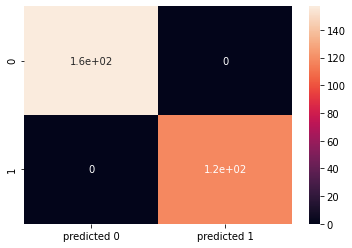

In [48]:
cm = metrics.confusion_matrix(y_test,multi_class_predict,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm,annot=True)

### Comparing All the Algorithms

In [61]:
print("LogisticRegression: {0:.4f}%".format(accuracies.mean()*100))
print("\n")
print("Support Vector Machine: {0:.4f}%".format(svm_accuracies.mean()*100))
print("\n")
print("Random Forest: {0:.4f}%".format(rfc_accuracies.mean()*100))
print("\n")
print("KNN: {0:.4f}%".format(knn_accuracies.mean()*100))
print("\n")
print("Nueral Network: {}%".format(100))
print("\n")

LogisticRegression: 98.3586%


Support Vector Machine: 98.5405%


Random Forest: 99.2727%


KNN: 99.7273%


Nueral Network: 100%


